# **Exploratory data analysis (EDA) with Pandas**


Import the libraries necessary for this lab. We can add some aliases to make the libraries easier to use in our code and set a default figure size for further plots. Ignore the warnings.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

Further specify the value of the `precision` parameter equal to 2 to display two decimal signs (instead of 6 as default).


In [2]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

Let's read the data and look at the first 5 rows using the `head` method. The number of the output rows from the dataset is determined by the `head` method parameter.


In [3]:
df = pd.read_csv('Students data.csv', sep = ',')
df.head(5)

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


### Let's look at the dataset size, feature names and their types


In [4]:
df.shape

(105, 17)

The dataset contains 105 objects (rows), for each of which 17 features are set (columns), including 1 target feature (`y`).


 Output the column (feature) names:


In [5]:
df.columns

Index(['ID', 'class', 'gender', 'race', 'GPA', 'Algebra', 'Calculus1',
       'Calculus2', 'Statistics', 'Probability', 'Measure',
       'Functional_analysis', 'from1', 'from2', 'from3', 'from4', 'y'],
      dtype='object')

To see the general information on all the DataFrame features (columns), we use the info method:

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

In [7]:
df.describe()

,ID,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from4,y
count,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00
mean,1193.00,1.79,82.96,76.06,71.96,78.94,85.13,83.88,80.76,75.32,0.50,0.71
std,30.45,1.67,6.05,11.72,12.20,15.00,10.27,10.51,10.30,13.00,0.89,0.83
min,1141.00,1.00,63.49,46.00,38.00,17.00,51.00,29.00,54.00,9.00,0.00,0.00
25%,1167.00,1.00,79.34,67.00,64.00,71.00,80.00,79.00,74.00,67.00,0.00,0.00
50%,1193.00,1.00,84.11,76.00,73.00,83.00,87.00,85.00,81.00,76.00,0.00,0.00
75%,1219.00,1.00,87.30,84.00,80.00,91.00,92.00,92.00,89.00,85.00,0.00,1.00
max,1245.00,7.00,93.71,98.00,100.00,99.00,100.00,97.00,100.00,100.00,3.00,2.00


To see the statistics on non-numeric features, you need to explicitly specify the feature types by the include parameter. You can also set include = all to output statistics on all the existing features.

In [8]:
df.describe(include = ["object"])

,class,gender,from1,from2,from3
count,105,105,105,105,105
unique,2,2,28,2,5
top,A,female,B,B,A
freq,76,68,9,73,81


For categorical (type object) and boolean (type bool) features you can use the value_counts method. Let's look at the target feature (gender) distribution:

In [9]:
df["gender"].value_counts()

female    68
male      37
Name: gender, dtype: int64

Let's look at the gender distribution. Specify the value of the normalize = True parameter to view relative frequencies, but not absolute.

In [10]:
df["gender"].value_counts(normalize = True)

female   0.65
male     0.35
Name: gender, dtype: float64

### Sorting


A DataFrame can be sorted by a few feature values. In our case, for example, by GPA (ascending = False for sorting in descending order):

In [11]:
df.sort_values(by = "GPA", ascending = False).head()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
104,1245,A,male,1,93.71,93,97,99,100,97,90,90,K,B,A,0,2
68,1209,A,female,1,93.06,82,90,93,91,93,99,94,M,B,S,0,0
75,1216,A,female,1,91.90,95,86,96,92,95,90,95,Z,B,A,2,1
96,1237,A,male,2,91.74,94,100,96,97,95,94,93,C,B,S,0,2
93,1234,A,female,1,91.61,93,82,95,95,94,100,93,Y,B,S,0,1


Sort by the column group:


In [12]:
df.sort_values(by = ["class", "GPA"], ascending = [True, False]).head()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
104,1245,A,male,1,93.71,93,97,99,100,97,90,90,K,B,A,0,2
68,1209,A,female,1,93.06,82,90,93,91,93,99,94,M,B,S,0,0
75,1216,A,female,1,91.90,95,86,96,92,95,90,95,Z,B,A,2,1
96,1237,A,male,2,91.74,94,100,96,97,95,94,93,C,B,S,0,2
93,1234,A,female,1,91.61,93,82,95,95,94,100,93,Y,B,S,0,1


In [13]:
df.apply(np.max)

ID                     1245
class                     B
gender                 male
race                      7
GPA                   93.71
Algebra                  98
Calculus1               100
Calculus2                99
Statistics              100
Probability              97
Measure                 100
Functional_analysis     100
from1                     Z
from2                     B
from3                     S
from4                     3
y                         2
dtype: object

In [14]:
print("y =", '{:.1%}'.format(df["y"].mean()))

y = 71.4%


In [15]:
df[df["y"] == 1].mean()

ID                    1205.36
race                     1.44
GPA                     86.15
Algebra                 82.08
Calculus1               75.40
Calculus2               85.72
Statistics              88.52
Probability             87.96
Measure                 86.36
Functional_analysis     82.12
from4                    0.56
y                        1.00
dtype: float64

In [21]:
print("Average GPA of females =",df[(df["y"] == 1) & (df["gender"] == "female")]["Algebra"].mean(), "percent")

Average GPA of females = 81.5 percent


In [22]:
df[-1:]

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
104,1245,A,male,1,93.71,93,97,99,100,97,90,90,K,B,A,0,2


In [23]:
pd.crosstab(df["y"], df["gender"])

gender,female,male
y,,
0,36,19
1,20,5
2,12,13


In [24]:
pd.crosstab(df["y"], df["gender"],
            normalize = 'index')

gender,female,male
y,,
0,0.65,0.35
1,0.80,0.20
2,0.48,0.52


In [25]:
df.pivot_table(
    ["gender", "class"],
    ["GPA"],
    aggfunc = "mean",
).head(10)

""
GPA
63.49
64.75
65.04
70.11
71.22
72.89
73.47
74.11
74.17


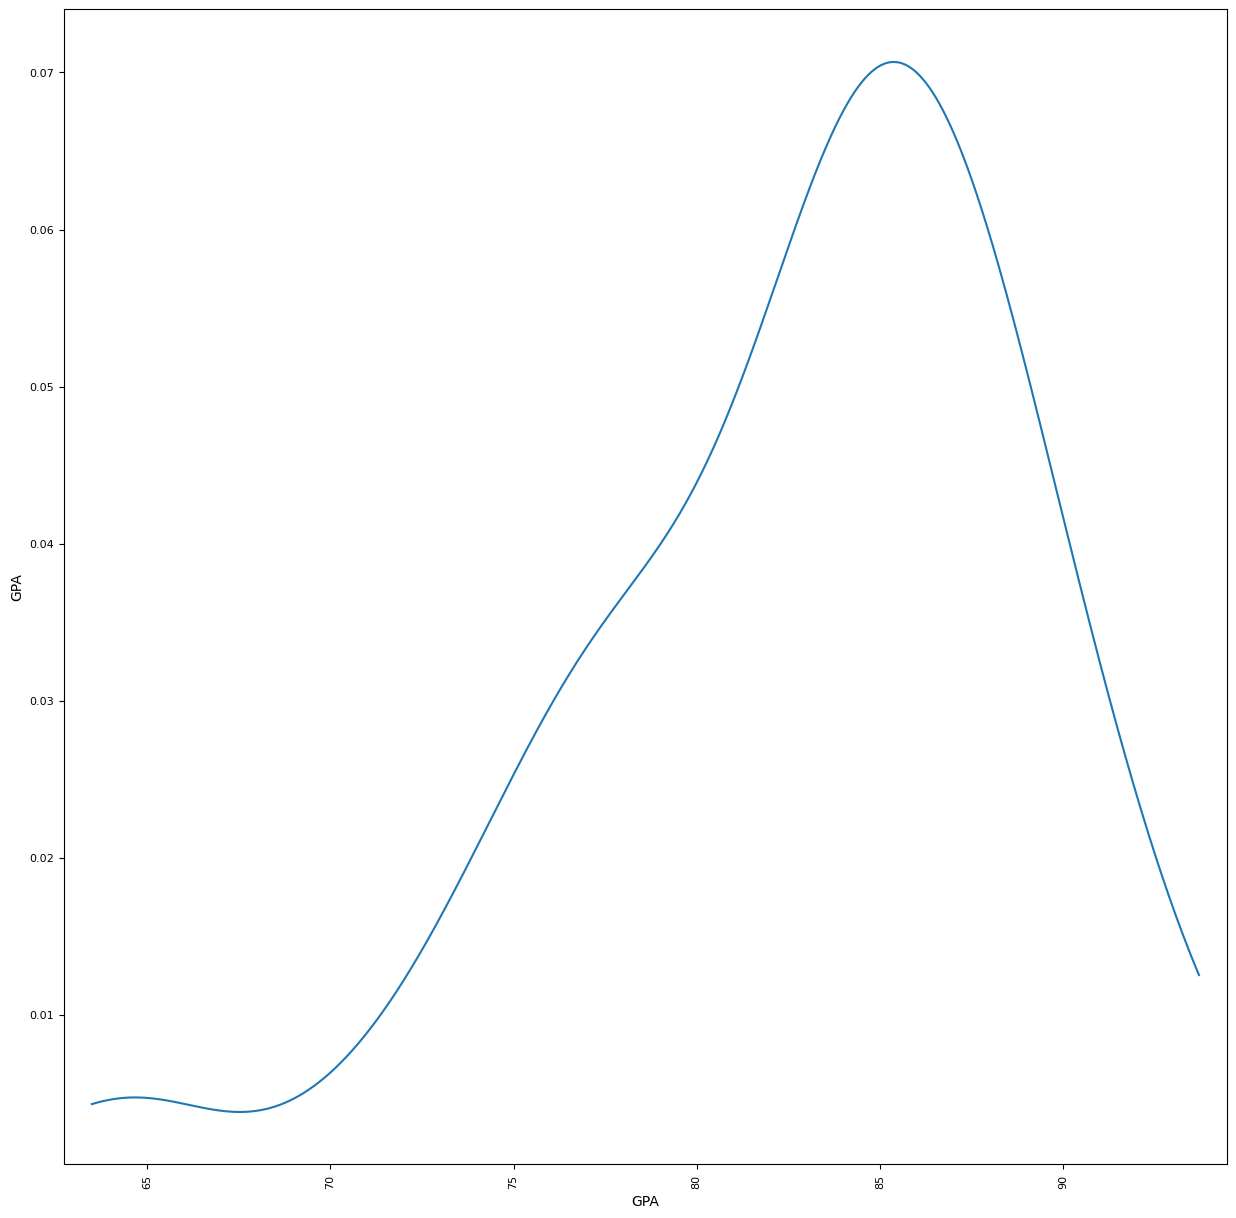

In [26]:
pd.plotting.scatter_matrix(
    df[["gender", "class", "GPA"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

<AxesSubplot:>

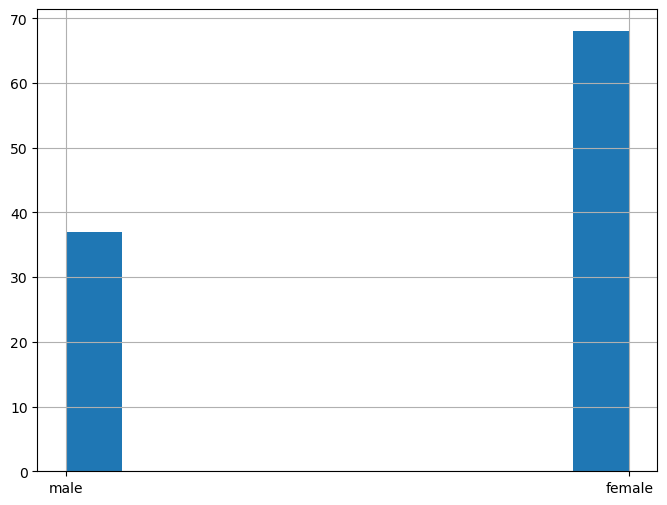

In [27]:
df["gender"].hist()

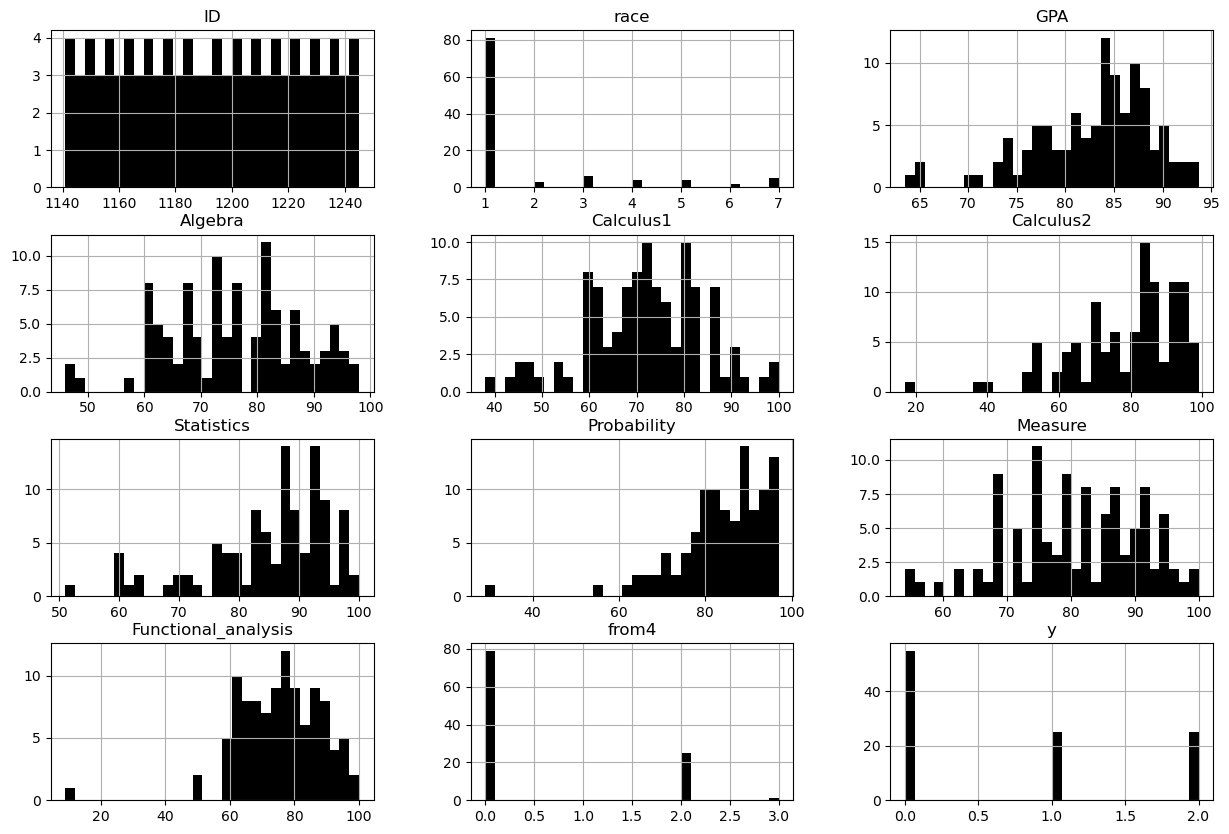

In [28]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

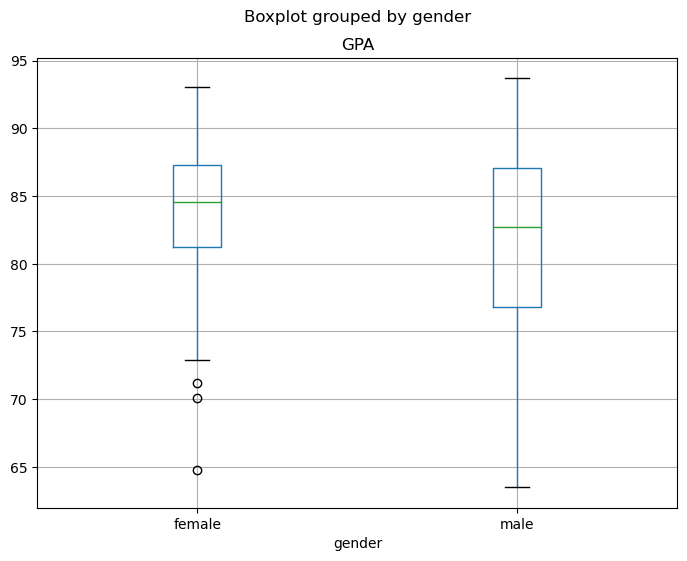

In [29]:
df.boxplot(column = "GPA",
           by = "gender")
plt.show()

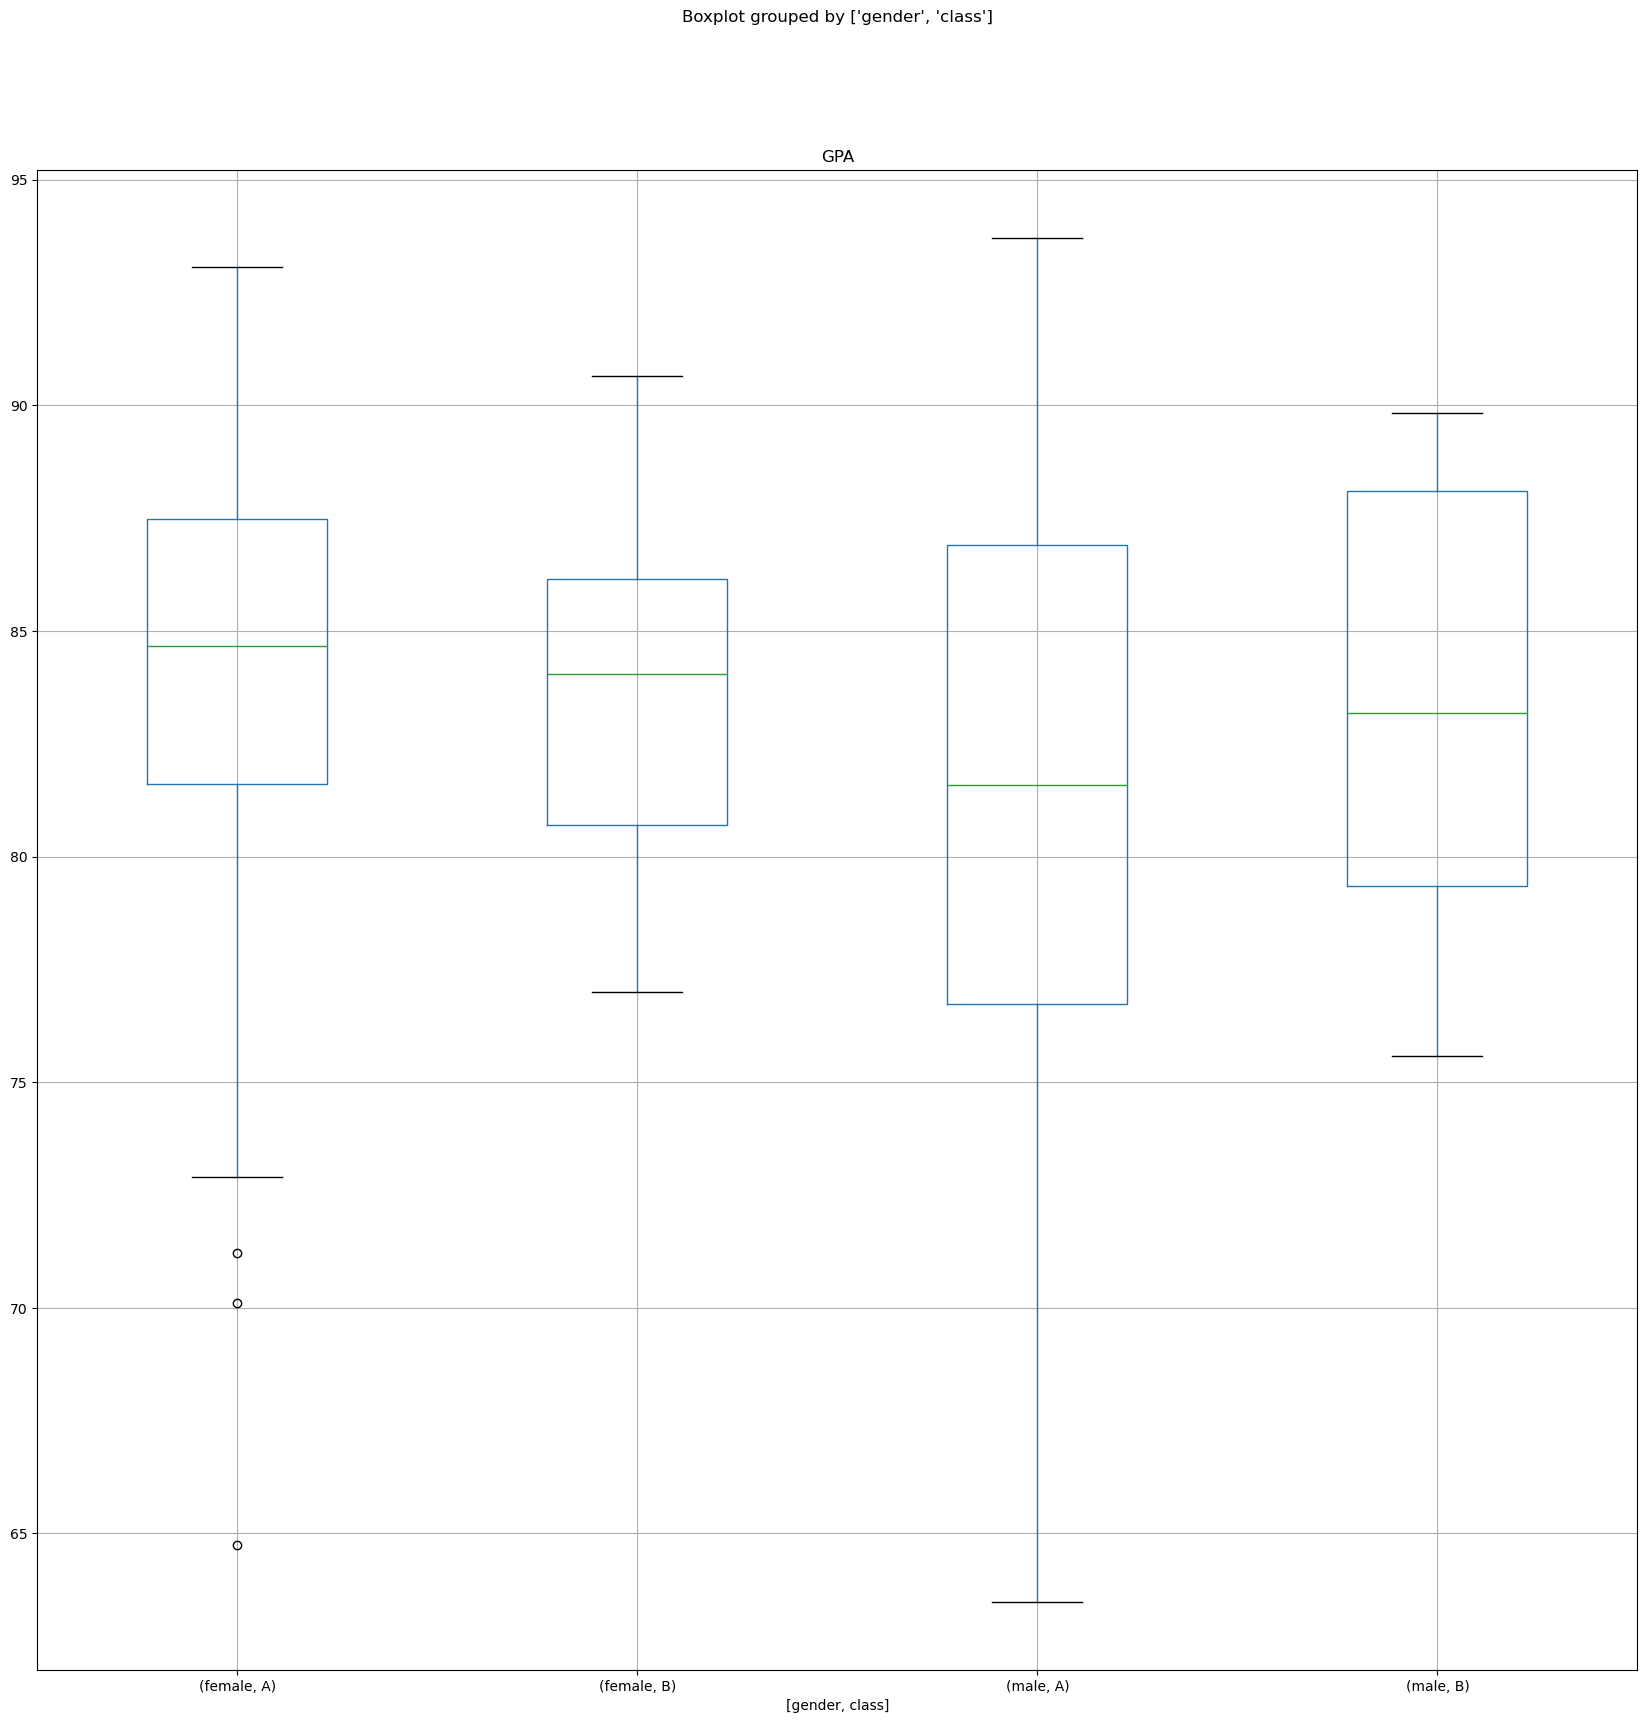

In [30]:
df.boxplot(column = "GPA",
           by = ["gender", "class"],
           figsize = (20, 20))
plt.show()